In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,validation_split=0.2)

In [79]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [96]:
#to split data into train and test add validation_split and subset
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'training')

Found 3457 images belonging to 5 classes.


In [97]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'validation')

Found 860 images belonging to 5 classes.


In [98]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [99]:
from tensorflow.keras.models import Sequential


In [100]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten


In [101]:
model=Sequential()

In [102]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [103]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [104]:
model.add(Flatten())

In [105]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [106]:
#hidden layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(5,activation='softmax'))#op layer

In [107]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [108]:
len(x_train)

35

In [112]:
3457/100

34.57

In [110]:
len(x_test)

9

In [115]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=30)

Epoch 1/30
35/35 [==============================] - 33s 950ms/step - loss: 0.4863 - accuracy: 0.8261 - val_loss: 1.3241 - val_accuracy: 0.5930
Epoch 2/30
35/35 [==============================] - 33s 932ms/step - loss: 0.4793 - accuracy: 0.8230 - val_loss: 1.3508 - val_accuracy: 0.6163
Epoch 3/30
35/35 [==============================] - 33s 926ms/step - loss: 0.4529 - accuracy: 0.8241 - val_loss: 1.3197 - val_accuracy: 0.5860
Epoch 4/30
35/35 [==============================] - 32s 925ms/step - loss: 0.4372 - accuracy: 0.8426 - val_loss: 1.2772 - val_accuracy: 0.6326
Epoch 5/30
35/35 [==============================] - 32s 919ms/step - loss: 0.3831 - accuracy: 0.8568 - val_loss: 1.5694 - val_accuracy: 0.5849
Epoch 6/30
35/35 [==============================] - 32s 919ms/step - loss: 0.3878 - accuracy: 0.8597 - val_loss: 1.2102 - val_accuracy: 0.6488
Epoch 7/30
35/35 [==============================] - 33s 928ms/step - loss: 0.3470 - accuracy: 0.8805 - val_loss: 1.3690 - val_accuracy: 0.6233

In [116]:
model.save('flowers.h5')

In [117]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [118]:
model=load_model('flowers.h5')

In [120]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/9904127656_f76a5a4811_m.jpg")

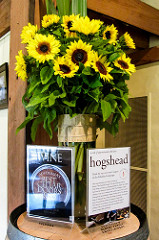

In [121]:
img

In [122]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/9904127656_f76a5a4811_m.jpg",target_size=(64,64))

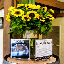

In [123]:
img

In [124]:
x=image.img_to_array(img)

In [125]:
x

array([[[ 94.,  61.,  30.],
        [137.,  98.,  57.],
        [141., 105.,  57.],
        ...,
        [181., 174., 119.],
        [186., 173., 120.],
        [185., 174., 118.]],

       [[130.,  81.,  38.],
        [155., 108.,  62.],
        [143., 105.,  56.],
        ...,
        [177., 171., 111.],
        [184., 174., 115.],
        [185., 168., 112.]],

       [[157., 107.,  56.],
        [152., 106.,  57.],
        [148., 107.,  53.],
        ...,
        [116.,  65.,  22.],
        [ 87.,  52.,   0.],
        [114.,  90.,  28.]],

       ...,

       [[245., 244., 249.],
        [244., 245., 249.],
        [218., 222., 225.],
        ...,
        [171., 142., 100.],
        [172., 144.,  94.],
        [165., 137.,  89.]],

       [[246., 248., 247.],
        [241., 242., 244.],
        [207., 207., 205.],
        ...,
        [173., 144., 100.],
        [176., 148., 100.],
        [171., 143.,  96.]],

       [[249., 249., 251.],
        [244., 248., 249.],
        [203., 1

In [126]:
x.shape

(64, 64, 3)

In [127]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [128]:
y=np.argmax(model.predict(x),axis=1)

In [129]:
y

array([3])

In [130]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [138]:
img = image.load_img(r"/content/drive/MyDrive/flowers/tulip/9444202147_405290415b_n.jpg",target_size=(64,64))
print(img)
x=image.img_to_array(img)
print(x)
x=np.expand_dims(x,axis=0)
print(x.shape)
y=np.argmax(model.predict(x),axis=1)
print(x_train.class_indices)
print(y)

<PIL.Image.Image image mode=RGB size=64x64 at 0x7F5DFC8AEA90>
[[[ 69.  66.  57.]
  [ 71.  68.  59.]
  [ 73.  70.  63.]
  ...
  [ 36.  36.  26.]
  [ 37.  34.  25.]
  [ 36.  33.  24.]]

 [[ 75.  72.  63.]
  [ 77.  74.  65.]
  [ 82.  78.  69.]
  ...
  [ 37.  37.  25.]
  [ 40.  38.  26.]
  [ 38.  36.  24.]]

 [[ 87.  85.  73.]
  [ 91.  89.  77.]
  [ 94.  90.  78.]
  ...
  [ 46.  44.  32.]
  [ 44.  42.  30.]
  [ 41.  39.  27.]]

 ...

 [[ 76.  82.  56.]
  [ 73.  79.  53.]
  [ 68.  73.  50.]
  ...
  [122. 129. 139.]
  [128. 132. 144.]
  [128. 132. 143.]]

 [[ 74.  83.  54.]
  [ 74.  80.  54.]
  [ 69.  74.  51.]
  ...
  [122. 129. 139.]
  [124. 130. 142.]
  [124. 128. 139.]]

 [[ 77.  83.  55.]
  [ 77.  81.  56.]
  [ 71.  76.  53.]
  ...
  [122. 124. 137.]
  [121. 127. 139.]
  [121. 125. 136.]]]
(1, 64, 64, 3)
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
[4]
